<a href="https://colab.research.google.com/github/moyi-brevian/credit-risk-modeling/blob/main/Credit_Risk_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('/content/german_credit_data.csv')

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df['Age'].describe()

,Age
count,1000.000000
mean,35.546000
std,11.375469
min,19.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,75.000000


In [7]:
df.shape

(1000, 11)

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna().reset_index(drop=True)

In [11]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


Exploratory data analysis.

In [12]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [13]:
df.drop(columns = 'Unnamed: 0' , inplace =True)

In [14]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

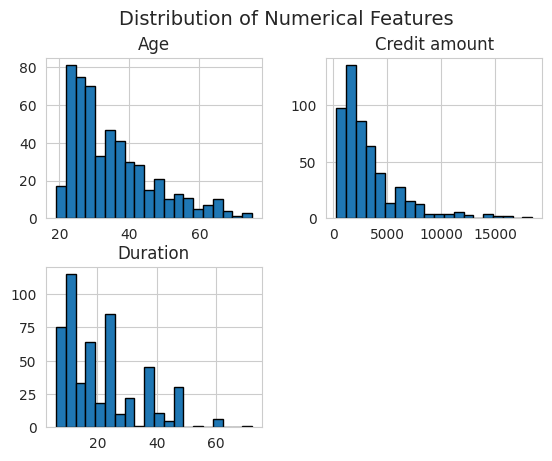

In [15]:
df[['Age', 'Credit amount', 'Duration']].hist(bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=14)
plt.show()

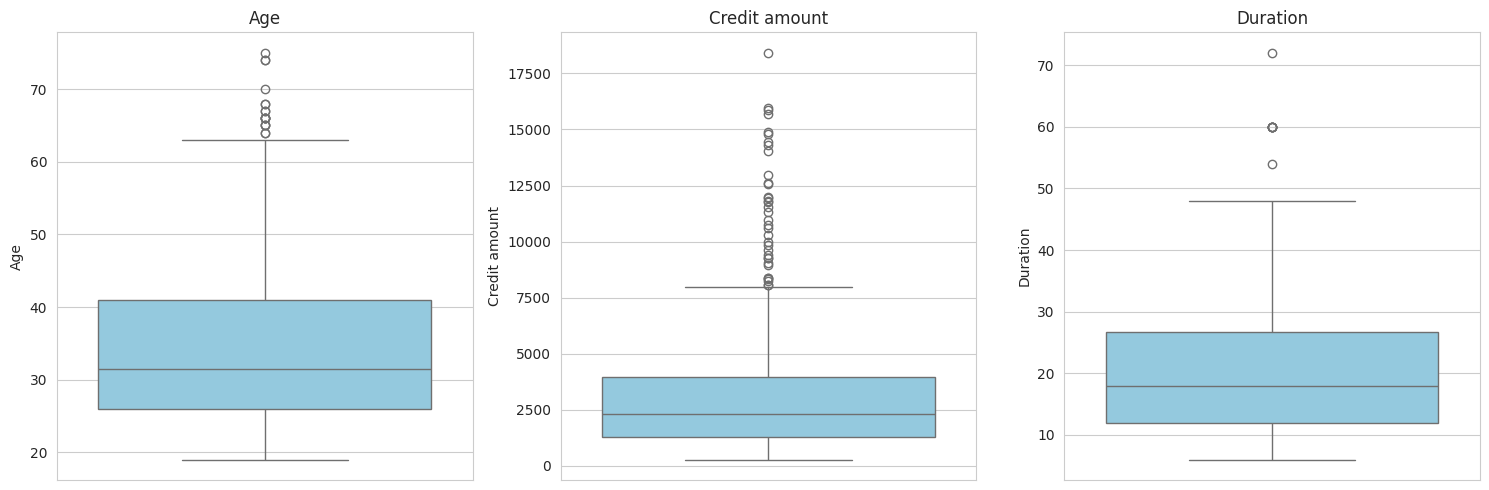

In [16]:
plt.figure(figsize =(15,5))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
  plt.subplot(1, 3, i + 1)
  sns.boxplot(y= df[col], color='skyblue')
  plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
df.query('Duration >= 60')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [18]:
categorical_cols = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']


/tmp/ipython-input-3207629512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col, palette='Set2', order = df[col].value_counts().index)
/tmp/ipython-input-3207629512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col, palette='Set2', order = df[col].value_counts().index)
/tmp/ipython-input-3207629512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x=col, palette='Set2', order = df[col].value_counts().index)
/tmp/ipython-input-3207629512.py:4: FutureWarning: 

Passing `palette` without ass

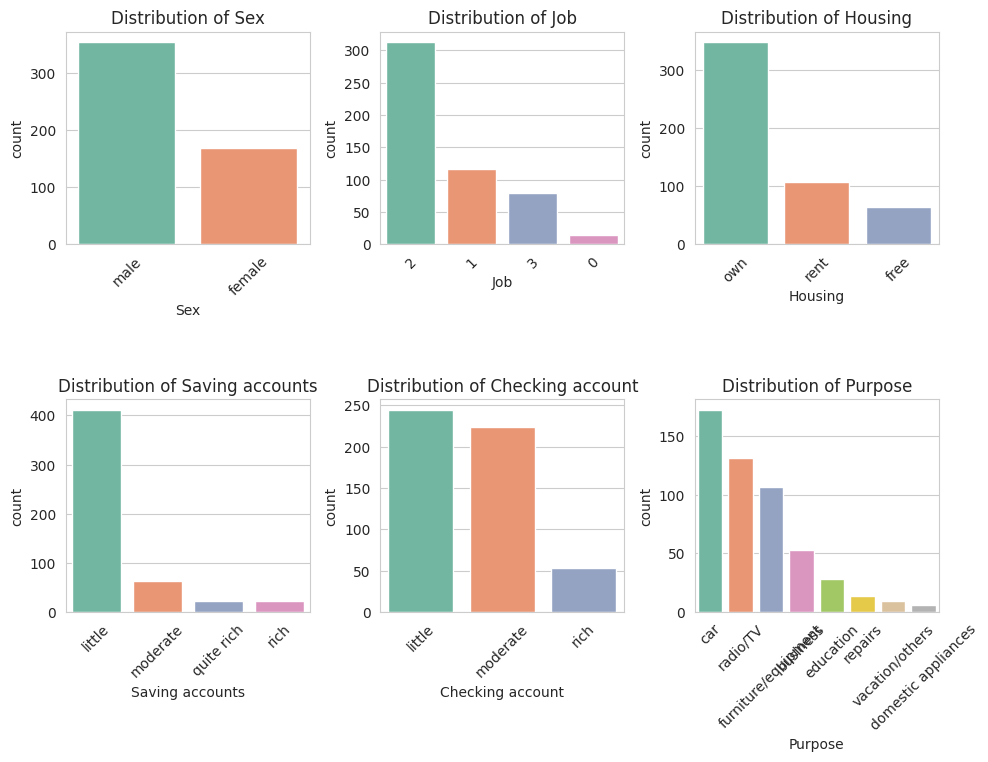

In [19]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3,3,i+1)
  sns.countplot(data= df, x=col, palette='Set2', order = df[col].value_counts().index)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
corr = df[['Age','Job','Credit amount','Duration']].corr()

In [21]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

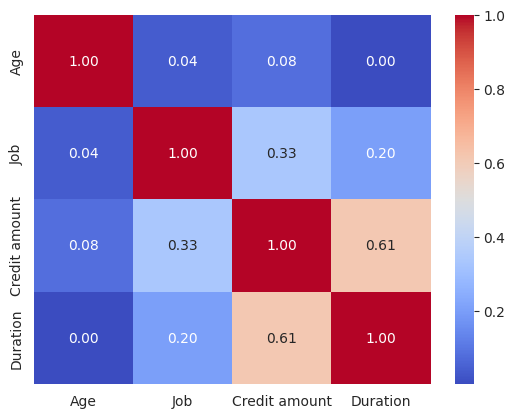

In [22]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show

In [23]:
df.groupby('Job')['Credit amount'].mean()

,Credit amount
Job,
0,1767.857143
1,2250.715517
2,3129.130990
3,5648.784810


In [24]:
df.groupby('Sex')['Credit amount'].mean()

,Credit amount
Sex,
female,2937.202381
male,3440.833333


In [25]:
pd.pivot_table(df, values='Credit amount', index='Housing', columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


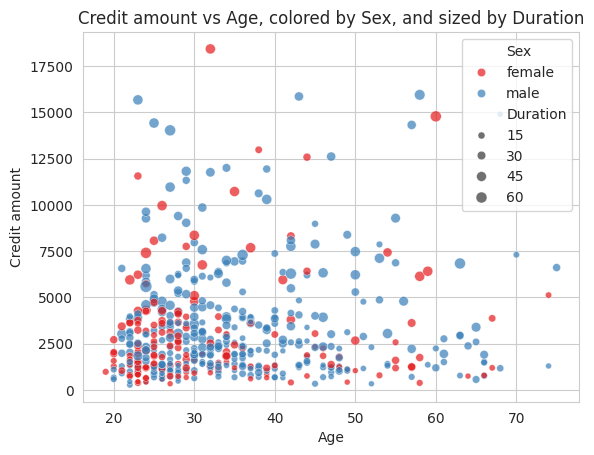

In [26]:
sns.scatterplot(data = df, x= 'Age', y='Credit amount', hue='Sex', size = 'Duration', alpha= 0.7, palette='Set1')
plt.title("Credit amount vs Age, colored by Sex, and sized by Duration")
plt.show()


/tmp/ipython-input-1158309416.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= df, x= "Saving accounts", y = "Credit amount", palette="Pastel1")


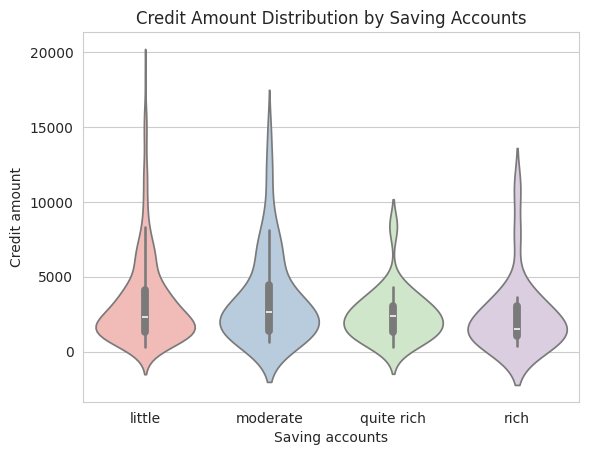

In [27]:
sns.violinplot(data= df, x= "Saving accounts", y = "Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [28]:
df["Risk"].value_counts(normalize=True) * 100

,proportion
Risk,
good,55.747126
bad,44.252874


/tmp/ipython-input-152975700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
/tmp/ipython-input-152975700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
/tmp/ipython-input-152975700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")


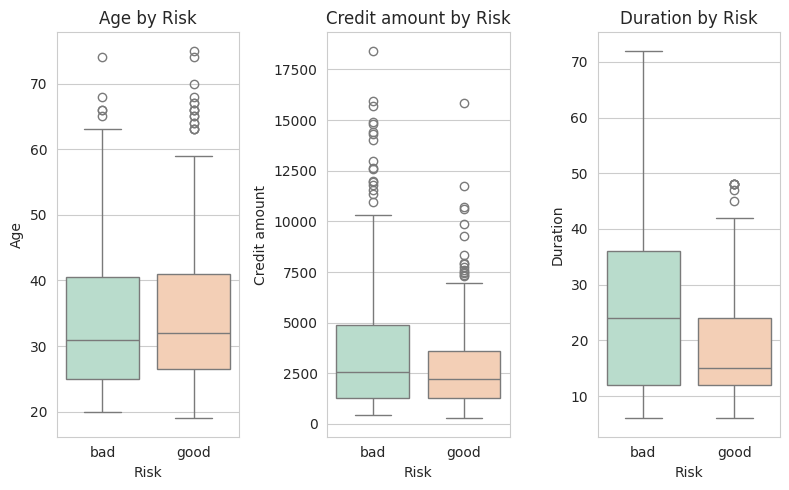

In [29]:
plt.figure(figsize=(8,5))
for i, col in enumerate(["Age","Credit amount","Duration"]):
  plt.subplot(1,3, i+1)
  sns.boxplot(data=df, x="Risk", y=col, palette="Pastel2")
  plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [30]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [31]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

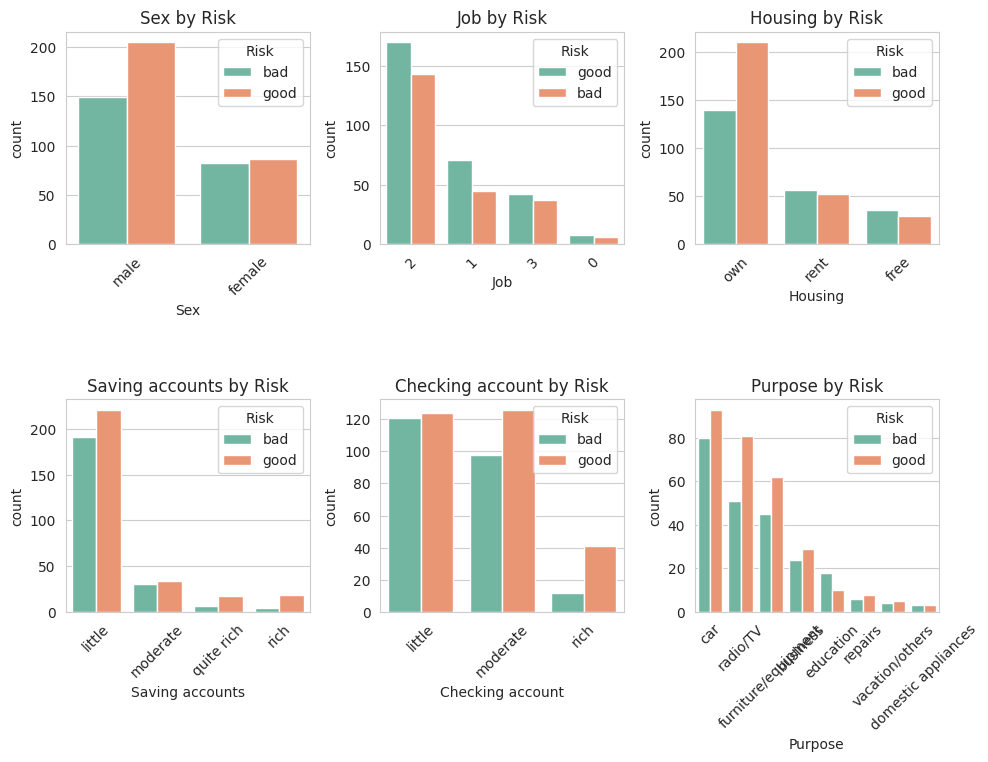

In [32]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3, 3, i + 1)
  sns.countplot(data=df, x=col, hue="Risk", palette="Set2", order = df[col].value_counts().index)
  plt.title(f"{col} by Risk")
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Feature engineering.

In [33]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [34]:
features = ["Age", "Sex","Job","Housing","Saving accounts","Checking account","Credit amount", "Duration"]

In [35]:
target = "Risk"

In [36]:
df_model = df[features + [target]].copy()

In [37]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [38]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [39]:
cat_cols = df_model.select_dtypes(include = "object").columns.drop("Risk")

In [40]:
le_dict = {}

In [41]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [42]:
for col in cat_cols:
  le = LabelEncoder()
  df_model[col] = le.fit_transform(df_model[col])
  le_dict[col] = le
  joblib.dump(le, f"{col}_encoder.pkl")

In [43]:
le_target = LabelEncoder()

In [44]:
target

'Risk'

In [45]:
df_model[target] = le_target.fit_transform(df_model[target])


In [46]:
df_model[target]

,Risk
0,0
1,1
2,0
3,1
4,0
...,...
517,1
518,1
519,1
520,0


In [47]:
df_model[target].value_counts()

,count
Risk,
1,291
0,231


In [48]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [49]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df_model.drop(target, axis = 1)

In [52]:
y = df_model[target]

In [53]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [54]:
y

,Risk
0,0
1,1
2,0
3,1
4,0
...,...
517,1
518,1
519,1
520,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [56]:
X_train.shape

(417, 8)

In [57]:
X_test.shape

(105, 8)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [59]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
  grid = GridSearchCV(model, param_grid, cv = 5, scoring = "accuracy", n_jobs= -1)
  grid.fit(X_train, y_train)
  best_model = grid.best_estimator_
  y_pred = best_model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  return best_model, acc, grid.best_params_


In [60]:
dt = DecisionTreeClassifier(random_state = 1, class_weight = "balanced")
dt_param_grid = {
    "max_depth": [None, 10, 20,],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]

    }

In [61]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [62]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.6


In [69]:
print("Best parameters", params_dt)

Best parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [70]:
rf = RandomForestClassifier(random_state = 1, class_weight = "balanced", n_jobs = -1)

In [71]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]
}

In [72]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [73]:
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.6190476190476191


In [74]:
print("Best params", params_rf)

Best params {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [78]:
et = ExtraTreesClassifier(random_state = 1, class_weight = "balance", n_jobs = -1)

In [79]:
et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]
}

In [80]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

ValueError: 
All the 360 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'class_weight' parameter of ExtraTreesClassifier must be a str among {'balanced', 'balanced_subsample'}, an instance of 'dict', an instance of 'list' or None. Got 'balance' instead.

--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'class_weight' parameter of ExtraTreesClassifier must be a str among {'balanced_subsample', 'balanced'}, an instance of 'dict', an instance of 'list' or None. Got 'balance' instead.


In [77]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

NameError: name 'et' is not defined